In [2]:
import numpy as np
import keras
from tensorflow.python.keras import backend as K
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Activation
from tensorflow.python.keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.layers.convolutional import *
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

Using TensorFlow backend.


In [3]:
train_dir = 'train'
valid_dir = 'val'
test_dir = 'test'

In [4]:
train_batches = ImageDataGenerator().flow_from_directory(train_dir, target_size=(150,150), classes=['NORMAL', 'PNEUMONIA'], batch_size=100)
valid_batches = ImageDataGenerator().flow_from_directory(valid_dir, target_size=(150,150), classes=['NORMAL', 'PNEUMONIA'], batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_dir, target_size=(150,150), classes=['NORMAL', 'PNEUMONIA'], batch_size=100)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [5]:
# Code to plot images with labels
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] !=3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [6]:
imgs, labels = next(train_batches)

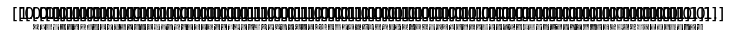

In [7]:
plots(imgs, titles=labels)

## Build and train CNN

In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    Flatten(),
    Dense(2, activation='softmax'),
])

In [9]:
#opt = keras.optimizers.Adam(learning_rate=.0001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(train_batches, steps_per_epoch=50,
                    validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

Epoch 1/5
50/50 - 124s - loss: 1649.0710 - accuracy: 0.7435 - val_loss: 89.9974 - val_accuracy: 0.8125
Epoch 2/5
50/50 - 111s - loss: 14.8551 - accuracy: 0.9258 - val_loss: 18.8765 - val_accuracy: 0.8750
Epoch 3/5
50/50 - 120s - loss: 2.9844 - accuracy: 0.9695 - val_loss: 13.3298 - val_accuracy: 0.9375
Epoch 4/5
50/50 - 125s - loss: 1.0330 - accuracy: 0.9829 - val_loss: 46.0077 - val_accuracy: 0.6875
Epoch 5/5
50/50 - 136s - loss: 0.4779 - accuracy: 0.9884 - val_loss: 17.9308 - val_accuracy: 0.8125


## Predict

In [11]:
test_imgs, test_labels = next(test_batches)
#plots(test_imgs, titles=test_labels)

In [12]:
test_labels = test_labels[:,0]
test_labels

array([0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [13]:
predictions = model.predict(test_batches, steps=1, verbose=0)

In [14]:
predictions = np.round(predictions)
predictions

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [15]:
cm = confusion_matrix(test_labels, predictions[:,0])

In [16]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/ cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    thresh = cm.max() /2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment='center',
                color='white' if cm[i, j] > thresh else 'black')
        
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[59  1]
 [25 15]]


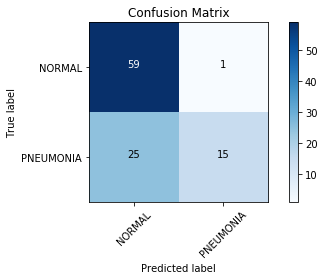

In [17]:
cm_plot_labels = ['NORMAL', 'PNEUMONIA']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

## Build Fine-tuned VGG16 model

In [18]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [19]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [20]:
type(vgg16_model)

tensorflow.python.keras.engine.training.Model

In [21]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [23]:
model.layers.pop()

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [25]:
for layer in model.layers:
    layer.trainable = False

In [26]:
model.add(Dense(2, activation='softmax'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

## Train the fine-tuned VGG16 model

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(train_batches, steps_per_epoch=50,
                    validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

Epoch 1/5


InvalidArgumentError:  Input to reshape is a tensor with 819200 values, but the requested shape requires a multiple of 25088
	 [[node sequential_1/flatten/Reshape (defined at <ipython-input-29-ae6862e4d476>:2) ]] [Op:__inference_train_function_3045]

Function call stack:
train_function
